<a href="https://colab.research.google.com/github/reinaldoasf/deeplearning/blob/master/Reinaldo_Separador_Train_Test_das_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Separando Conjuntos de Teste e Treino

Neste notebook terá o código necessário para ler as imagens do dataset de raios X do pulmão.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/gdrive")#, force_remount=True)
%cd /gdrive/My\ Drive/Kaggle


CATEGORIES = ["COVID", "NORMAL","PNEUMONIA"]

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1YSZg0Et9SrBuc91EBiHqhCI6Q8lKQ6YD/Kaggle


In [ ]:
!ls COVID-19/

 COVID-19		  NORMAL.metadata.xlsx	'Viral Pneumonia.matadata.xlsx'
 COVID-19.metadata.xlsx   README.md.txt
 NORMAL			 'Viral Pneumonia'


In [ ]:


import cv2
import os, glob
from PIL import Image, ImageOps
import numpy as np
import seaborn as sns
from imutils import paths
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet101, Xception
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Criando os dados de treino e teste

In [ ]:
LR = 0.001
EPOCHS = 20
BATCH_SIZE = 32
#COVID_LEN = len(glob.glob("COVID-19/COVID-19/*"))

INP_SIZE = (224,224,3)
def create_data(dir_name):
    temp_data = []
    img_list = glob.glob(dir_name + '/*')
    for img in img_list:
        image = Image.open(img).resize((64, 64))#Tive que mudar o tamanho pq tava estourando a memória RAM do Colab
        image = ImageOps.grayscale(image=image)
        image = np.array(image)
        temp_data.append(image)
    return temp_data

data = []
labels = []

covid_dir = 'COVID-19/COVID-19'
normal_dir = 'COVID-19/NORMAL'
pneumonia_dir = 'COVID-19/Viral Pneumonia'

data.extend(create_data(covid_dir))
COVID_LEN = len(data)
data.extend(create_data(normal_dir))
normal_len = len(data)
data.extend(create_data(pneumonia_dir))





In [ ]:
 data = np.array(data)/255.0
labels = []
for i in range(len(data)):
  if i < COVID_LEN:
    labels.append(0) 
  elif i < normal_len:
    labels.append(1)
  else:
    labels.append(2) 
labels_array = np.array(labels)
#lb = LabelBinarizer()
print(labels_array.shape)
#labels_array = lb.fit_transform(labels_array)
labels_array = to_categorical(labels,num_classes=3)

data_array = np.array(data)
print(data_array.shape)
print(labels_array.shape)
print(labels_array)

#data_array=data_array.reshape(data_array.shape[0],data_array.shape[1],data_array.shape[2],1)
#print(data_array.shape)

(2905,)
(2905, 64, 64)
(2905, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_array, labels_array, test_size=0.25,random_state=42,stratify=labels_array)
x_train_reshape = x_train
x_test_reshape = x_test
x_train_reshape = x_train_reshape.reshape(list(x_train_reshape.shape) + [1]) 
x_test_reshape  = x_test_reshape.reshape(list(x_test_reshape.shape) + [1]) 

# Criando a Arquitetura da Rede

In [ ]:
import keras
model = Sequential()


model.add(Conv2D(64, (3, 3),input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
print(x_train_reshape.shape)

(2178, 64, 64, 1)


# Iniciando o treinamento

In [ ]:

model.fit(x_train_reshape, y_train, batch_size=32, epochs=14, validation_split=0.2)

Epoch 1/14
55/55 [==============================] - 7s 122ms/step - loss: 0.0243 - categorical_accuracy: 0.9948 - val_loss: 0.2173 - val_categorical_accuracy: 0.9381
Epoch 2/14
55/55 [==============================] - 7s 122ms/step - loss: 0.0163 - categorical_accuracy: 0.9994 - val_loss: 0.2156 - val_categorical_accuracy: 0.9404
Epoch 3/14
55/55 [==============================] - 7s 123ms/step - loss: 0.0113 - categorical_accuracy: 0.9994 - val_loss: 0.2133 - val_categorical_accuracy: 0.9427
Epoch 4/14
55/55 [==============================] - 7s 123ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.2379 - val_categorical_accuracy: 0.9312
Epoch 5/14
55/55 [==============================] - 7s 124ms/step - loss: 0.0082 - categorical_accuracy: 1.0000 - val_loss: 0.2466 - val_categorical_accuracy: 0.9312
Epoch 6/14
55/55 [==============================] - 7s 124ms/step - loss: 0.0066 - categorical_accuracy: 1.0000 - val_loss: 0.2329 - val_categorical_accuracy: 0.9381
Epoc

# Avaliando a rede

In [ ]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(x_test_reshape), axis=1)
y_pred = to_categorical(y_pred,num_classes=3)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.864     0.927     0.895        55
           1      0.976     0.964     0.970       335
           2      0.967     0.967     0.967       337

   micro avg      0.963     0.963     0.963       727
   macro avg      0.936     0.953     0.944       727
weighted avg      0.963     0.963     0.963       727
 samples avg      0.963     0.963     0.963       727



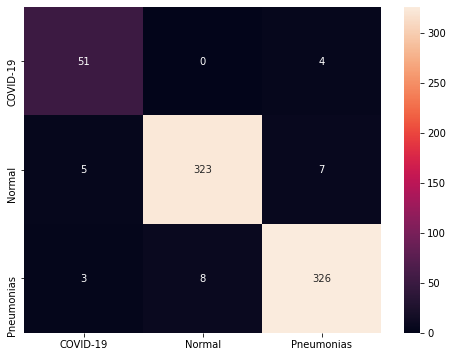

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))#, labels=["Normal", "COVID-19"])
plt.figure(figsize=(8, 6))

ax = sns.heatmap(conf_matrix, fmt=".0f", annot=True)
ax.set_yticklabels([ "COVID-19","Normal","Pneumonias"])
ax.set_xticklabels([ "COVID-19","Normal","Pneumonias"])
plt.show()


(2905, 4096)
Iniciando t-SNE...
t-SNE finalizado, plotando gráfico da distribuição...


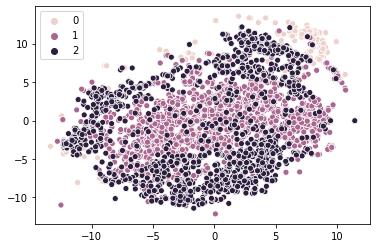

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50, n_iter=300, n_iter_without_progress=100)

x_flattened = np.array(list(map(lambda x: x.flatten(), data)))
print(x_flattened.shape)
print("Iniciando t-SNE...")
x_embedded = tsne.fit_transform(x_flattened)
print("t-SNE finalizado, plotando gráfico da distribuição...")
sns.scatterplot(x_embedded[:, 0], x_embedded[:, 1], hue=labels, )


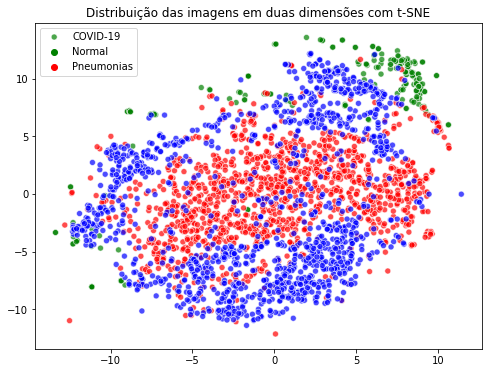

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x_embedded[:, 0], x_embedded[:, 1], hue=labels, alpha=0.7, palette=["green", "red", "blue"])
plt.title("Distribuição das imagens em duas dimensões com t-SNE")
plt.legend(["COVID-19", "Normal","Pneumonias"])